In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import os

In [2]:
online_retail =pd.read_excel('Online Retail.xlsx')

In [3]:
df = online_retail

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'].dt.strftime('%Y-%m-%d'))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [7]:
df = df[df['UnitPrice']>0]

In [8]:
df['Total_Price'] = df['Quantity']*df['UnitPrice']
grp_date = df[['Quantity','InvoiceDate','UnitPrice','Description','Total_Price']].groupby('InvoiceDate')
grp_date = grp_date.sum()

sale = grp_date[['Total_Price']]
sale.to_csv('DailySalesTrending.csv')
sale

<ipython-input-8-9d99330e5e68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Price'] = df['Quantity']*df['UnitPrice']


,Total_Price
InvoiceDate,
2010-12-01,58635.56
2010-12-02,46207.28
2010-12-03,45620.46
2010-12-05,31383.95
2010-12-06,53860.18
...,...
2011-12-05,57751.32
2011-12-06,54228.37
2011-12-07,75076.22


In [9]:
df1 = pd.read_csv('DailySalesTrending.csv')

df1['InvoiceDate'] = df1['InvoiceDate'].astype('datetime64[ns]')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceDate  305 non-null    datetime64[ns]
 1   Total_Price  305 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.9 KB


In [10]:
df1.set_index(df1['InvoiceDate'],drop=False,inplace=True)

missing_date = pd.date_range(start ='2010-12-01', end ='2011-12-09').difference(df1.index)

In [11]:
df1 = df1.reindex(pd.date_range(start ='2010-12-01', end ='2011-12-09'))
df1.fillna(0,inplace=True)
df1['InvoiceDate'] = df1.index

In [12]:

df1['year'] = df1['InvoiceDate'].dt.year
df1['month'] = df1['InvoiceDate'].dt.month
df1['day'] = df1['InvoiceDate'].dt.day
df1['week'] = df1['InvoiceDate'].dt.week
df1['weekday'] = df1['InvoiceDate'].dt.weekday
df1['dayofyear'] = df1['InvoiceDate'].dt.dayofyear

In [13]:
df1.head()

,InvoiceDate,Total_Price,year,month,day,week,weekday,dayofyear
2010-12-01,2010-12-01,58635.56,2010,12,1,48,2,335
2010-12-02,2010-12-02,46207.28,2010,12,2,48,3,336
2010-12-03,2010-12-03,45620.46,2010,12,3,48,4,337
2010-12-04,2010-12-04,0.00,2010,12,4,48,5,338
2010-12-05,2010-12-05,31383.95,2010,12,5,48,6,339


In [14]:
df1.to_csv('Cleaned_Data.csv')

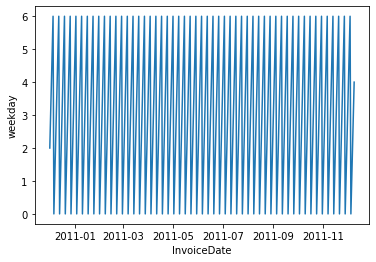

In [33]:
sns.lineplot(x='InvoiceDate', y='weekday', data = df1)

In [36]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

plot = [go.Bar(x=df1.InvoiceDate, y = df1.day)]
layout = go.Layout(yaxis={'autorange':True, 'title':'Log10 number of orders'},xaxis={'title':'month'})
fig = go.Figure(data=plot, layout=layout)
iplot(fig)

In [47]:
df4 = df1

In [51]:
#df4.rename(columns={'Total_Price' : 'TotalSales'}, inplace = True)
#df4.describe()
#df4.set_index('InvoiceDate',inplace=True)

In [49]:
df4.head()

,TotalSales,year,month,day,week,weekday,dayofyear
InvoiceDate,,,,,,,
2010-12-01,58635.56,2010,12,1,48,2,335
2010-12-02,46207.28,2010,12,2,48,3,336
2010-12-03,45620.46,2010,12,3,48,4,337
2010-12-04,0.00,2010,12,4,48,5,338
2010-12-05,31383.95,2010,12,5,48,6,339


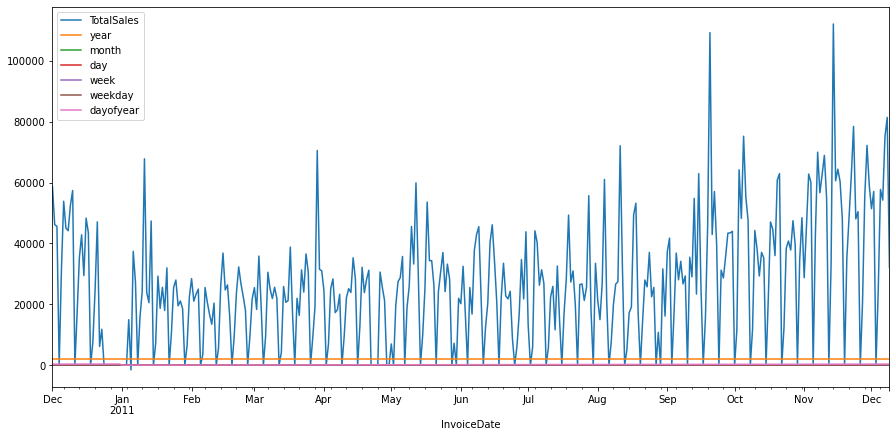

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df5.plot()

In [52]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df4['TotalSales'])
print(test_result)

(-1.951069284156362, 0.308430678684222, 13, 360, {'1%': -3.448645946352023, '5%': -2.869602139060357, '10%': -2.5710650077160495}, 7774.285841320173)


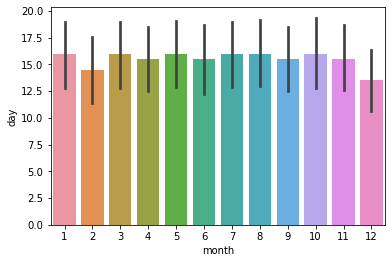

In [40]:
sns.barplot(x='month', y='day', data = df1)

In [119]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

#if result.loc['p-value'] <= 0.05:
    #print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
#else:
    #print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df5['TotalSales'])

ADF Test Statistic : -1.951069284156362
p-value : 0.308430678684222
#Lags Used : 13
Number of Observations : 360


In [120]:
df4['Sales First Difference'] = df4['TotalSales'] - df4['TotalSales'].shift(1)
df4['Seasonal First Difference']=df4['TotalSales']-df4['TotalSales'].shift(12)
df4.head()

,TotalSales,year,month,day,week,weekday,dayofyear,Sales First Difference,Seasonal First Difference,forecast
InvoiceDate,,,,,,,,,,
2010-12-01,58635.56,2010,12,1,48,2,335,NaN,NaN,NaN
2010-12-02,46207.28,2010,12,2,48,3,336,-12428.28,NaN,NaN
2010-12-03,45620.46,2010,12,3,48,4,337,-586.82,NaN,NaN
2010-12-04,0.00,2010,12,4,48,5,338,-45620.46,NaN,NaN
2010-12-05,31383.95,2010,12,5,48,6,339,31383.95,NaN,NaN


In [121]:
adfuller_test(df5['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.751426835221899
p-value : 2.9443568966687127e-09
#Lags Used : 16
Number of Observations : 345


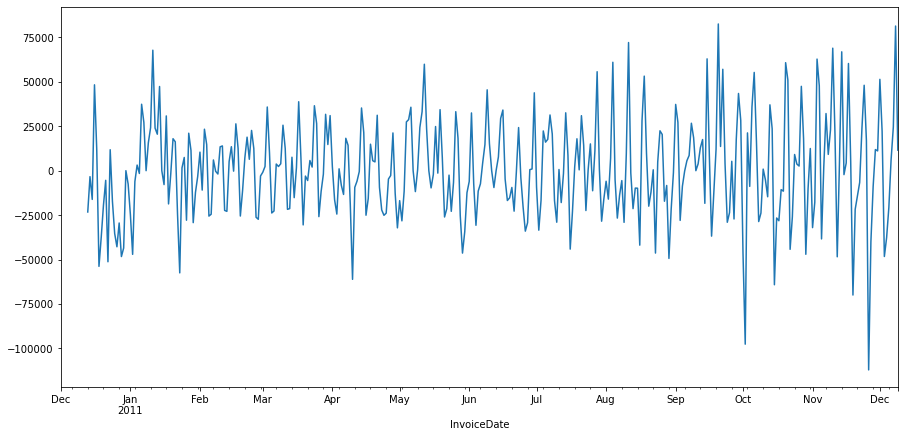

In [122]:
df5['Seasonal First Difference'].plot()

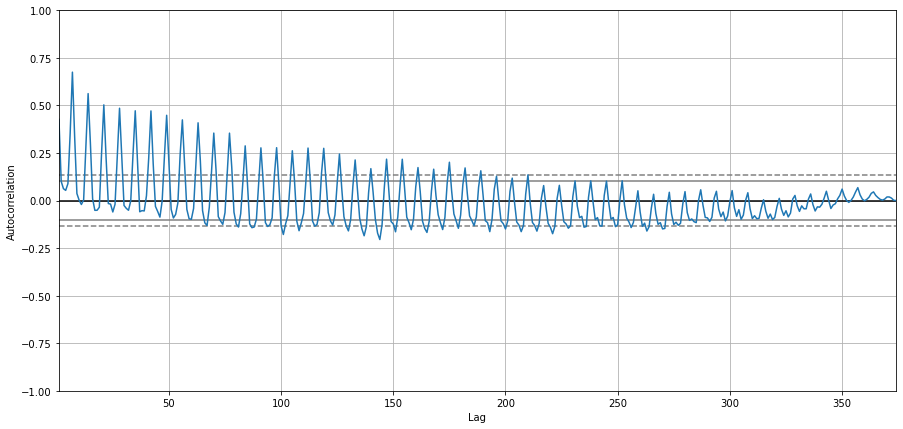

In [123]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df5['TotalSales'])
plt.show()

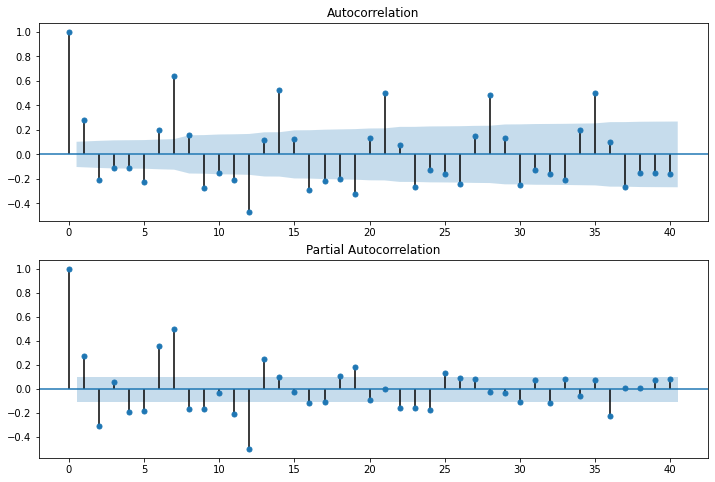

In [124]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df5['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df5['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [133]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df5['TotalSales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.TotalSales   No. Observations:                  373
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4174.743
Method:                       css-mle   S.D. of innovations          17509.892
Date:                Sun, 14 Feb 2021   AIC                           8357.487
Time:                        19:36:28   BIC                           8373.173
Sample:                    12-31-2010   HQIC                          8363.716
                         - 12-31-2011                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.4324     46.598      1.297      0.195     -30.898     151.763
ar.L1.D.TotalSales     0.2965      0.053      5.628      0.000       0.193       0.400
ma.L1.D.TotalSales    -0.9670      0.015    -65.065      0.000      -0.996      -0.938
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.3725           +0.0000j            3.3725            0.0000
MA.1            1.0342           +0.0000j            1.0342            0.0000
-----------------------------------------------------------------------------
"""

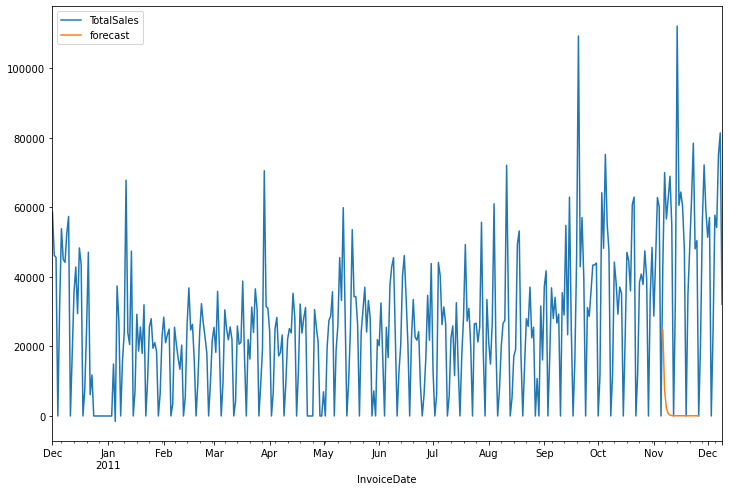

In [92]:
df4['forecast']=model_fit.predict(start=330,end=350,dynamic=True)
df4[['TotalSales','forecast']].plot(figsize=(12,8))

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



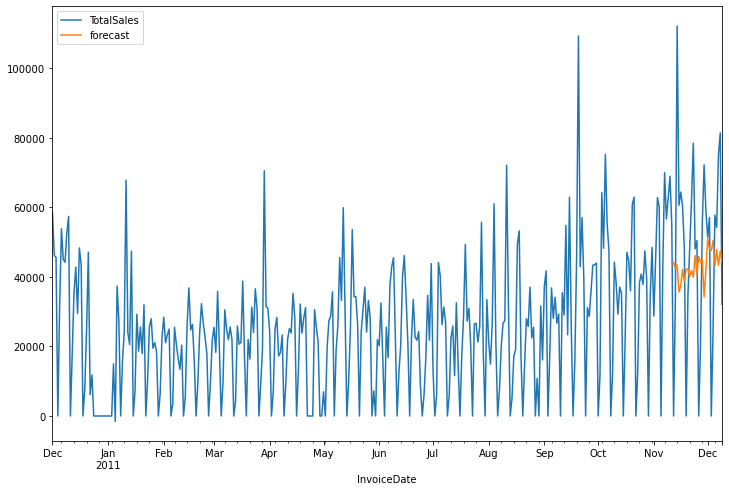

In [116]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df4['TotalSales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df4['forecast']=results.predict(start=345,end=389,dynamic=True)
df4[['TotalSales','forecast']].plot(figsize=(12,8))

In [134]:
results.predict(start = 385, end = 420, dynamic= True)

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2012: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.



2011-12-21    49220.127759
2011-12-22    55546.955654
2011-12-23    51059.359233
2011-12-24    51681.353849
2011-12-25    49796.011837
2011-12-26    53445.318510
2011-12-27    44599.946194
2011-12-28    52889.060995
2011-12-29    57447.769339
2011-12-30    49927.260823
2011-12-31    54874.428587
2012-01-01    60801.077631
2012-01-02    47659.272545
2012-01-03    55567.652175
2012-01-04    50659.735676
2012-01-05    52680.268774
2012-01-06    51351.468669
2012-01-07    54885.730301
2012-01-08    49672.392583
2012-01-09    56743.665591
2012-01-10    59155.156673
2012-01-11    51335.007536
2012-01-12    55088.979915
2012-01-13    60984.527416
2012-01-14    50555.295301
2012-01-15    58085.711568
2012-01-16    53278.244259
2012-01-17    54964.550980
2012-01-18    53502.747037
2012-01-19    57064.502433
2012-01-20    50983.171607
2012-01-21    58345.487626
2012-01-22    61270.126294
2012-01-23    53521.586054
2012-01-24    57560.711380
2012-01-25    63463.691609
Freq: D, dtype: float64